In [0]:
!pip install git+git://github.com/stared/livelossplot.git
!pip install q keras==2.2.4

In [0]:
keras.__version__

In [0]:
import numpy as np
np.random.seed(0) 

#Tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

from livelossplot.tf_keras import PlotLossesCallback #<= automatyczne tworzenie krzywej uczenia się

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


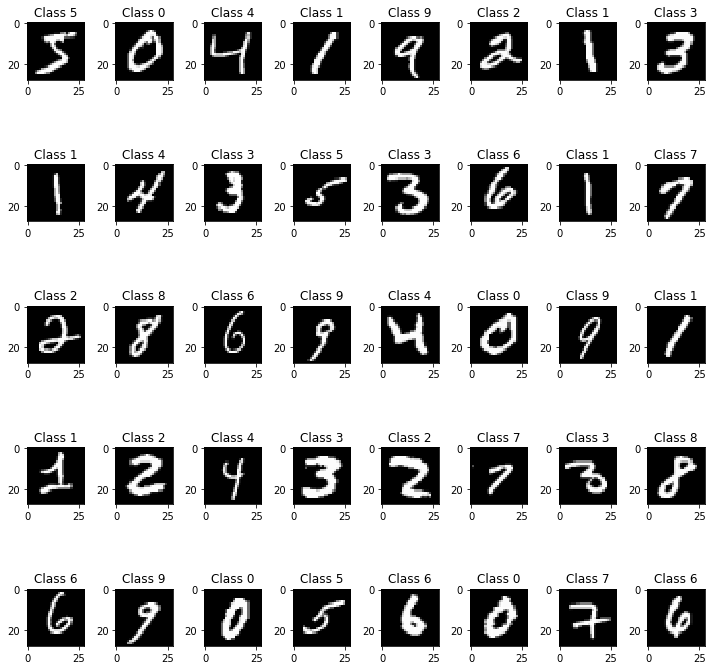

In [0]:
#print first 40 numbers
fig = plt.figure(figsize=(10, 10))
for idx in range(40):
    plt.subplot(5,8,idx+1)
    plt.imshow(X_train[idx], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[idx]))
    
plt.tight_layout()

In [0]:
#from X_train and X_test shape we can see that we are missing info about the number of channels, required for CNN
K.image_data_format()

'channels_last'

In [0]:
#add channels
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
#normalize the data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [0]:
#one-hot encoding for target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = 10

In [0]:
model =   Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding ='valid'),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.25),
        Dense(num_classes, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 64)        

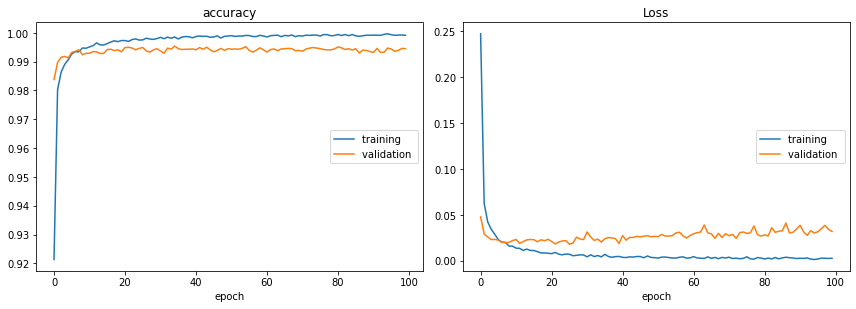

accuracy
	training         	 (min:    0.921, max:    1.000, cur:    0.999)
	validation       	 (min:    0.984, max:    0.995, cur:    0.994)
Loss
	training         	 (min:    0.001, max:    0.247, cur:    0.003)
	validation       	 (min:    0.018, max:    0.048, cur:    0.032)
235/235 [==============================] - 3s 11ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0318 - val_accuracy: 0.9945


In [0]:
plot_losses = PlotLossesCallback()

history = model.fit(X_train, y_train,
  batch_size=256, epochs=100,
  verbose=1,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.032545678317546844
Test accuracy: 0.9944999814033508
CNN Error: 0.55%


In [0]:
#let's when we were wrong
y_pred = model.predict(X_test)

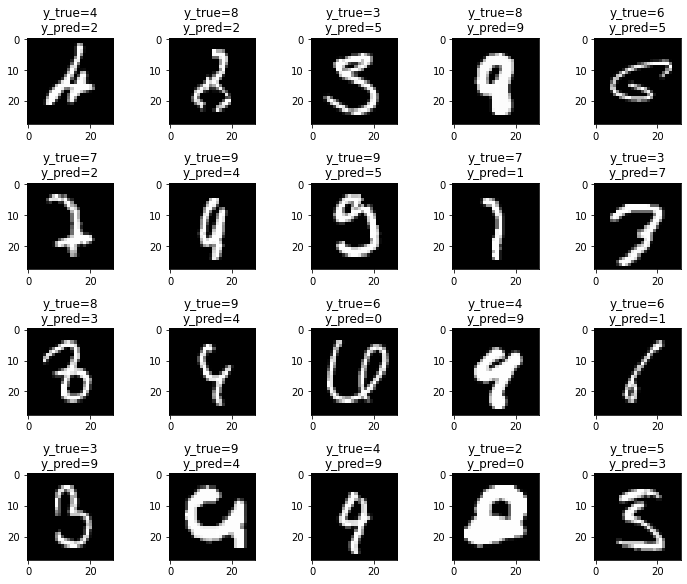

In [0]:
def get_diff(y_test, y_pred):
    for idx, (a, b) in enumerate(zip(y_test, y_pred)):
        if np.argmax(a) == np.argmax(b): continue
        yield idx, np.argmax(a), np.argmax(b)

limit = 19
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( X_test.shape[:-1] )

for it, (idx, y_test_val, y_pred_val) in enumerate(get_diff(y_test, y_pred)):
    if cur_limit > limit: break
      
    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_true={0}\ny_pred={1}'.format(y_test_val, y_pred_val))
    plt.tight_layout()
        
    cur_limit += 1

In [0]:
model =   Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding ='same'),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding ='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding ='same'),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)        

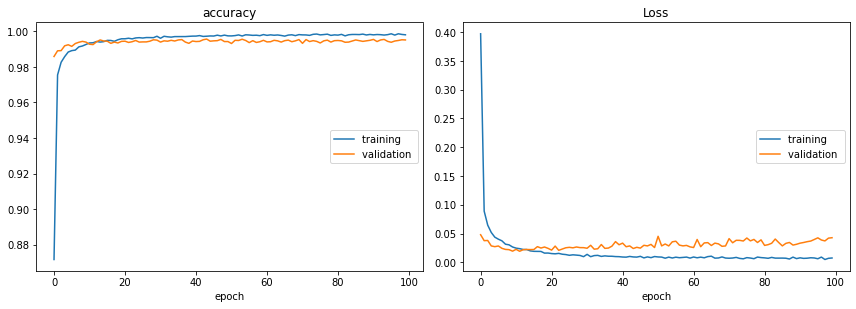

accuracy
	training         	 (min:    0.872, max:    0.999, cur:    0.998)
	validation       	 (min:    0.986, max:    0.996, cur:    0.995)
Loss
	training         	 (min:    0.005, max:    0.397, cur:    0.008)
	validation       	 (min:    0.019, max:    0.048, cur:    0.043)
477/477 [==============================] - 4s 8ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0427 - val_accuracy: 0.9951


In [0]:
plot_losses = PlotLossesCallback()

history = model.fit(X_train, y_train,
  batch_size=126, epochs=100,
  verbose=1,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.04302266612648964
Test accuracy: 0.9951000213623047
CNN Error: 0.49%


In [3]:
!git config --global user.email 'kuband93@gmail.com'
!git config --global user.name "Jakub Andrzejewski"
!git add CNN_mnist_data.ipynb
!git commit -m "Creating CNN for mnist dataset - Test loss: ~0.04 Test accuracy: ~0.99 CNN Error: ~0.49%"
!git push -u origin master

fatal: pathspec 'CNN_mnist_data.ipynb' did not match any files
On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
	CNN_zalando_mnist.ipynb

nothing added to commit but untracked files present
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
